In [ ]:
# Importing packages

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#  Load the dataset from my disk
df_train = pd.read_csv("/content/tweets_train.csv")
df_test = pd.read_csv('/content/tweets_test.csv')

In [ ]:
df_test.isnull().sum()

user_name             0
user_location       601
user_description    221
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
hashtags            648
source                0
is_retweet            0
clean_text            1
dtype: int64

In [ ]:
df_train.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
0,Romy 👑,Bolton - England,"Tables turn, bridges burn, you live and learn.",2009-06-15 09:00:39,525,896,3854,False,2020-09-19 15:19:32,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TLynn Peterson,"Black Canyon City, Arizona",Acquired disability ♿ after an accident. Livin...,2013-05-29 00:17:46,5045,5374,48152,False,2020-09-13 00:31:46,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma If we don t agree on what is ...,Positive
2,Rutger Kosters,Netherlands,Cloud Solution Architect @NetApp | VCDX #209 |...,2014-10-07 09:34:10,574,251,1070,False,2020-09-09 21:10:33,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma scary to see social ...,Negative
3,IDFWU🗯🇿🇼🇿🇦,"East London, South Africa","YOU HAVE OPTIONS, YOU CAN’T JUST TAKE WHAT LIF...",2012-08-22 11:09:06,706,618,1320,False,2020-09-11 04:33:08,NaN,Twitter for Android,False,You check your social media before you pee in ...,Positive
4,Treebel,NaN,NaN,2010-09-25 07:25:31,9,13,55,False,2020-09-17 16:27:38,['thesocialdilemma'],Twitter for iPhone,False,watch thesocialdilemma and see what s actually...,Negative


In [ ]:
df_train.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'is_retweet', 'clean_text', 'Sentiment'],
      dtype='object')

In [ ]:
df_test.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'is_retweet', 'clean_text'],
      dtype='object')

In [ ]:
print(df_train.shape, df_test.shape)

(17000, 14) (3068, 13)


In [ ]:
df_train['Sentiment'].value_counts()

Positive    8059
Neutral     5927
Negative    3014
Name: Sentiment, dtype: int64

In [ ]:
Pos = round(df_train['Sentiment'].value_counts()[0]/ len(df_train)*100,2)
Neu = round(df_train['Sentiment'].value_counts()[1]/ len(df_train)*100,2)
Neg = round(df_train['Sentiment'].value_counts()[2]/ len(df_train)*100,2)

print('This train_dataset contain {}% Positive Sentiment tweet'.format(Pos))
print("***********"*10)
print('This train_dataset contain {}% Neg Sentiment tweet'.format(Neg))
print("***********"*10)
print('This train_dataset contain {}% Neu Sentiment tweet'.format(Neu))

This train_dataset contain 47.41% Positive Sentiment tweet
**************************************************************************************************************
This train_dataset contain 17.73% Neg Sentiment tweet
**************************************************************************************************************
This train_dataset contain 34.86% Neu Sentiment tweet


In [ ]:
len(df_train)

17000

In [ ]:
df_train['Sentiment'].value_counts()[2]

3014

In [ ]:
# Select relevant columns
df_train = df_train[['clean_text', 'Sentiment']]
df_train.head()

,clean_text,Sentiment
0,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TheSocialDilemma If we don t agree on what is ...,Positive
2,Watching TheSocialDilemma scary to see social ...,Negative
3,You check your social media before you pee in ...,Positive
4,watch thesocialdilemma and see what s actually...,Negative


In [ ]:
df_train['clean_text'][4]

'watch thesocialdilemma and see what s actually going on And share it s scary but 100 true'

In [ ]:
# create a label columns using label encoding method
lab = {'Neutral':0, "Positive":1, "Negative":2}
df_train['label'] = df_train['Sentiment'].map(lab)
df_train.head()

,clean_text,Sentiment,label
0,TheSocialDilemma is an eye opener isn t it ple...,Neutral,0
1,TheSocialDilemma If we don t agree on what is ...,Positive,1
2,Watching TheSocialDilemma scary to see social ...,Negative,2
3,You check your social media before you pee in ...,Positive,1
4,watch thesocialdilemma and see what s actually...,Negative,2


In [ ]:
df_train = df_train[['clean_text', 'label']]
df_train.head(2)

,clean_text,label
0,TheSocialDilemma is an eye opener isn t it ple...,0
1,TheSocialDilemma If we don t agree on what is ...,1


In [ ]:
# Check for missing value
df_train.isnull().sum()

clean_text    8
label         0
dtype: int64

In [ ]:
# drop missing rows
df_train = df_train.dropna()
df_train.isnull().sum()

clean_text    0
label         0
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16992 entries, 0 to 16999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean_text  16992 non-null  object
 1   label       16992 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 398.2+ KB


In [ ]:
# convert training dataset into tensorflow dataset format
train_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (tf.cast(df_train["clean_text"].values, tf.string),
         tf.cast(df_train["label"].values, tf.int32)

        )
    )


)

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [ ]:
# print first 5 record from train dataset
for example, label in train_dataset.take(5):
  print("example :", example.numpy())
  print("label :", label.numpy())

example : b'TheSocialDilemma is an eye opener isn t it please ignore the irony of me tweeting about it'
label : 0
example : b'TheSocialDilemma If we don t agree on what is true or that there is such a thing as truth we re toast This is'
label : 1
example : b'Watching TheSocialDilemma scary to see social media is fucking up the mental health of Gen X'
label : 2
example : b'You check your social media before you pee in the morning or whilst you are peeing Those are only 2 choices you ha'
label : 1
example : b'watch thesocialdilemma and see what s actually going on And share it s scary but 100 true'
label : 2


In [ ]:
a = "Hello World"
abc = tf.constant("Hello World")
print(a)
print(abc)

Hello World
tf.Tensor(b'Hello World', shape=(), dtype=string)


In [ ]:
hello = tf.constant("Hello World", shape=[6,2])
print(hello)

tf.Tensor(
[[b'Hello World' b'Hello World']
 [b'Hello World' b'Hello World']
 [b'Hello World' b'Hello World']
 [b'Hello World' b'Hello World']
 [b'Hello World' b'Hello World']
 [b'Hello World' b'Hello World']], shape=(6, 2), dtype=string)


In [ ]:
# just an example

In [ ]:
BUFFER_SIZE= 10000
BATCH_SIZE = 64

In [ ]:
# create batches of the dataset
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(1):
  print("example :", example.numpy())
  print("****************************")
  print("label :", label.numpy())
  print("****************************")
  print("total len :", len(label.numpy()))

example : [b'the world is beautiful look it s great out there No better way to end it TheSocialDilemma'
 b'You are watching TheSocialDilemma on a platform that is known for giving you dopamine hits Netflix'
 b'Watch TheSocialDilemma on Netflix I m begging you'
 b'Netflix s TheSocialDilemma is just an international version of Ravish Kumars Prime Time'
 b'My biggest takeaway from TheSocialDilemma Social Justice Warriors I m sorry for blaming you for obsessing It s'
 b'Watch for this night TheSocialDilemma Starting now'
 b'So I just watched The Social Dilemma on Netflix and it made me want to delete the Facebook app again But instead'
 b'Twitchy Watch the movie TheSocialDilemma And you will want to go back to a rotary phone'
 b'I have been waiting this for a long time TheSocialDilemma'
 b'Well TheSocialDilemma just effed me right up'
 b'Watching TheSocialDilemma Its wild how half of this is genuinely intriguing and the other half is this contrived pointless dramatization'
 b'TheSocialDile

In [ ]:
# creating training and validation split
val_dataset = train_dataset.take(100)
train_dataset = train_dataset.skip(100)

In [ ]:
val_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Create the text encoder

VOCAB_SIZE = 1000
encoder = keras.layers.experimental.preprocessing.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

vocab = np.array(encoder.get_vocabulary())
vocab[0:20]

array(['', '[UNK]', 'thesocialdilemma', 'the', 'i', 'to', 'on', 'and',
       'you', 'a', 'is', 'it', 'social', 'watch', 'of', 'netflix', 's',
       'this', 'media', 'for'], dtype='<U16')

In [ ]:
encoded_example = encoder("This pen is a nice pen").numpy()
encoded_example

array([ 17,   1,  10,   9, 898,   1])

In [ ]:
# Defining RNN model architecture

model = keras.Sequential([
    encoder, keras.layers.Embedding(input_dim = len(encoder.get_vocabulary()), output_dim=64, mask_zero=True),
    keras.layers.SimpleRNN(64),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')]

)

In [ ]:
# Compiling RNN Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training our model

EPOCHS = 25
result = model.fit(train_dataset, epochs=EPOCHS, validation_data=val_dataset)

Epoch 1/25
166/166 [==============================] - 27s 113ms/step - loss: 0.7995 - accuracy: 0.6552 - val_loss: 0.5207 - val_accuracy: 0.8070
Epoch 2/25
166/166 [==============================] - 11s 66ms/step - loss: 0.4611 - accuracy: 0.8339 - val_loss: 0.3613 - val_accuracy: 0.8797
Epoch 3/25
166/166 [==============================] - 9s 57ms/step - loss: 0.3742 - accuracy: 0.8740 - val_loss: 0.3238 - val_accuracy: 0.8914
Epoch 4/25
166/166 [==============================] - 9s 55ms/step - loss: 0.3223 - accuracy: 0.8939 - val_loss: 0.3123 - val_accuracy: 0.8955
Epoch 5/25
166/166 [==============================] - 13s 74ms/step - loss: 0.2841 - accuracy: 0.9039 - val_loss: 0.2418 - val_accuracy: 0.9237
Epoch 6/25
166/166 [==============================] - 9s 52ms/step - loss: 0.2583 - accuracy: 0.9147 - val_loss: 0.2223 - val_accuracy: 0.9270
Epoch 7/25
166/166 [==============================] - 8s 50ms/step - loss: 0.2266 - accuracy: 0.9250 - val_loss: 0.2009 - val_accuracy: 0.

In [ ]:
# evaluating model
test_loss , test_acc = model.evaluate(train_dataset)

166/166 [==============================] - 2s 9ms/step - loss: 0.0361 - accuracy: 0.9889


In [ ]:
print("Test Loss {}".format(test_loss))
print("Test Accuracy : {}".format(test_acc))

Test Loss 0.0361470952630043
Test Accuracy : 0.9888595342636108


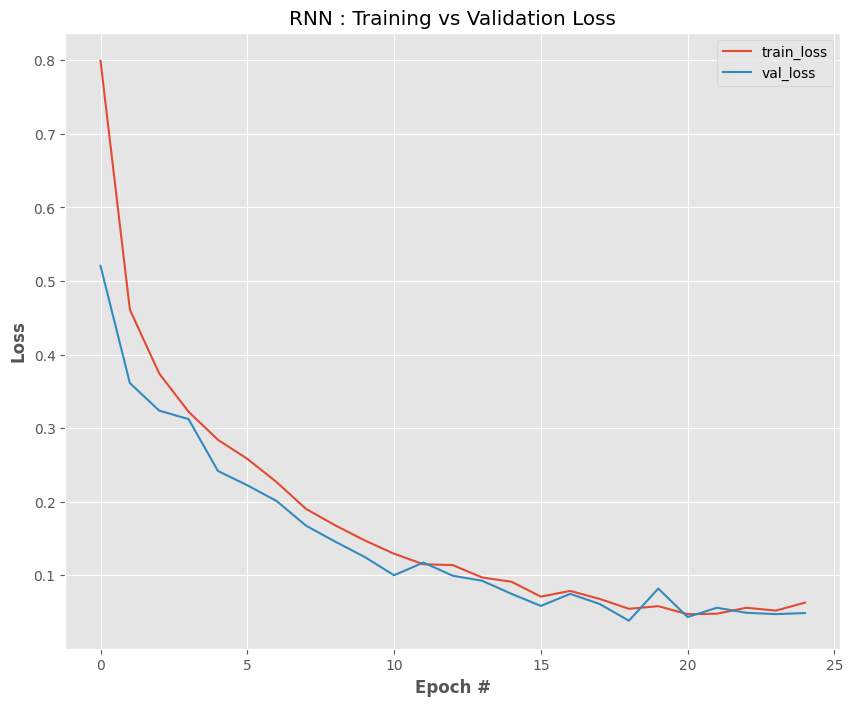

In [ ]:
# Plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize= [10, 8])
plt.plot(N, result.history["loss"], label='train_loss')
plt.plot(N, result.history["val_loss"], label='val_loss')
plt.title("RNN : Training vs Validation Loss")
plt.xlabel("Epoch #", weight ='bold')
plt.ylabel("Loss", weight ='bold')
plt.legend()
plt.show()

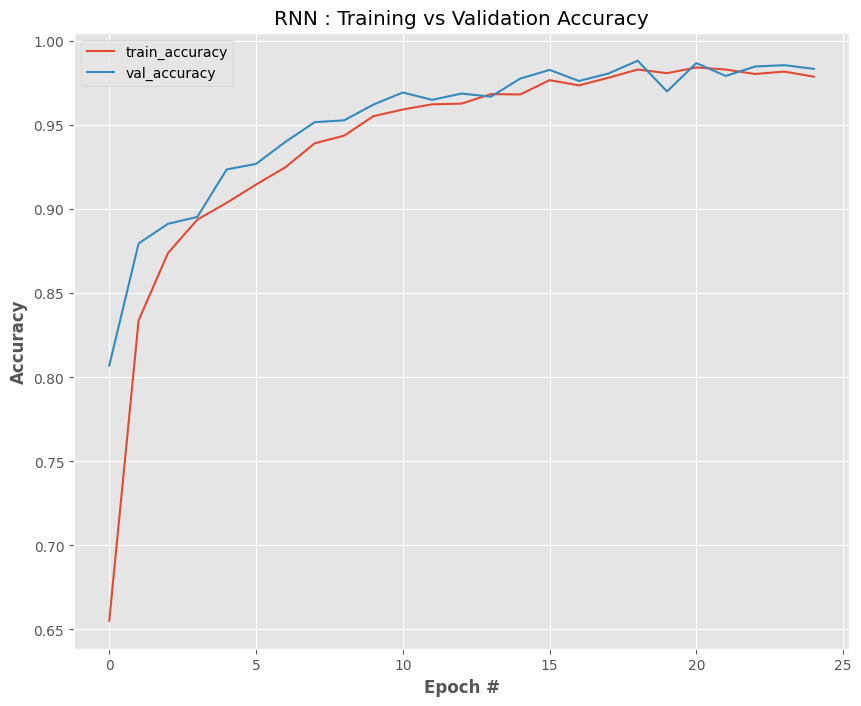

In [ ]:
# Plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize= [10, 8])
plt.plot(N, result.history["accuracy"], label='train_accuracy')
plt.plot(N, result.history["val_accuracy"], label='val_accuracy')
plt.title("RNN : Training vs Validation Accuracy")
plt.xlabel("Epoch #", weight ='bold')
plt.ylabel("Accuracy", weight ='bold')
plt.legend()
plt.show()

In [ ]:
# Predict on a sample text

sample_text = ("The movie was Good, I would recommend this movie. Please go and watch, it's worth it to watch.")

prediction = model.predict(np.array([sample_text]))
print(prediction)

# add final prediction to dataframe

if np.argmax(prediction) == 0:
  print("Neutral")
elif np.argmax(prediction) == 1:
  print("Positive")
else:
  print("Negative")

1/1 [==============================] - 0s 24ms/step
[[6.3156115e-08 9.9984312e-01 1.5673898e-04]]
Positive


In [ ]:
sample_text = ("This movie was not Good. Please don't waste your time and money.")

prediction = model.predict(np.array([sample_text]))
print(prediction)

# add final prediction to dataframe

if np.argmax(prediction) == 0:
  print("Neutral")
elif np.argmax(prediction) == 1:
  print("Positive")
else:
  print("Negative")

1/1 [==============================] - 0s 21ms/step
[[3.9755137e-06 9.9970967e-01 2.8632506e-04]]
Positive
